The US Department of Agriculture makes available a database of food nutrient infor- mation. Ashley Williams, an English hacker, has made available a version of this da- tabase in JSON format (http://ashleyw.co.uk/project/food-nutrient-database). The re- cords look like this:

{ "id": 21441, "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading", "tags": ["KFC"], "manufacturer": "Kentucky Fried Chicken", "group": "Fast Foods", "portions": [ { "amount": 1, "unit": "wing, with skin", "grams": 68.0 },

...
], "nutrients": [ { "value": 20.8, "units": "g", "description": "Protein", "group": "Composition" },

...
] }

Each food has a number of identifying attributes along with two lists of nutrients and portion sizes. Having the data in this form is not particularly amenable for analysis, so we need to do some work to wrangle the data into a better form.

Step 1: Download and upload the json file into Google Colab

Step 2: Load the json file into a Python Dictionary "db" with json library

Driver: Bhavin Patel 
Observer - 01: Yash Mitakari 
Observer - 02: Sapna Patel

In [2]:
import json
db = json.load(open('database.json'))
len(db)

6636

Each entry in db is a dict containing all the data for a single food. The 'nutrients' field is a list of dicts, one for each nutrient:

Step 3: Check the keys in dict db in first row.

In [3]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

Step 4: Check the keys in "nutrients" in first row.

In [4]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

Step 5: Convert "nutrients" of first row into a Dataframe called as nutrients.

In [6]:
import pandas as pd
nutrients = pd.DataFrame(db[0]['nutrients'])

Step 6: Build another DataFrame info by extracting 'description','group','id' and 'manufacture'.

In [8]:
info = pd.DataFrame(db, columns=['description', 'group', 'id', 'manufacture'])

Step 7: Check the distribution of food groups with value_counts.

In [9]:
info['group'].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

Step 8: Let us assemble the nutrients for each food into a single large table nutrients. First, covert each list of food nutrients to a DataFrame, add a column for the food id, and append the DataFrame to a list. Then, these can be concatenated together with concat.

In [10]:
nutrients = []
for rec in db:
  fnuts = pd.DataFrame(rec['nutrients'])
  fnuts['id'] = rec['id']
  nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

If all goes well, nutrients should look like this:

<class 'pandas.core.frame.DataFrame'> 
Int64Index: 389355 entries, 0 to 389354 
Data columns:
description 389855 non-null values
group 389855 non-null values
units 389855 non-null values
value 389855 non-null values
id 389855 non-null values
dtypes: float64(1), int64(1), object(3)

Step 9: Drop duplicates in this DataFrame

In [11]:
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Step 10: Since 'group' and 'description' is in both DataFrame objects, we can rename them to make it clear what is what.
info: --> fgroup, food
nutrients: --> nutgroup, nutrient

In [12]:
info = info.rename(columns={'group':'fgroup', 'description':'food'})
nutrients = nutrients.rename(columns={'group':'nutgroup', 'description':'nutrient'})

Step 11: Merge info with nutrients. Call new dataframe as ndata.

In [13]:
ndata = pd.merge(info, nutrients, on='id', how='outer')

Step 12: Get a plot of median values by food group and nutrient type.

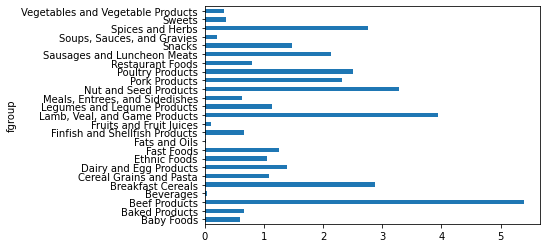

In [60]:
ndata.head()
result=ndata.groupby(['nutrient', 'fgroup'])['value'].median()
result['Zinc, Zn'].plot(kind='barh')

Step 13: How do we know which food is most dense in each nutrient.

In [37]:
result=ndata.groupby(['nutgroup', 'nutrient'])['value', 'food'].max()
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


value                                               food
nutgroup    nutrient                                                                                 
Amino Acids Alanine                          8.009  Yogurt, vanilla, low fat, 11 grams protein per...
            Arginine                         7.436  Yogurt, vanilla, low fat, 11 grams protein per...
            Aspartic acid                   10.203  Yogurt, vanilla, low fat, 11 grams protein per...
            Cystine                          1.307  Yogurt, vanilla, low fat, 11 grams protein per...
            Glutamic acid                   17.452  Yogurt, vanilla, low fat, 11 grams protein per...
...                                            ...                                                ...
Vitamins    Vitamin D2 (ergocalciferol)     28.100  Soymilk, original and vanilla, with added calc...
            Vitamin D3 (cholecalciferol)    27.400  Yogurt, vanilla, low fat, 11 grams protein per...
            Vitamin E (alpha-tocopherol)   149.400  Yogurt, vanilla, low fat, 11 grams protein per...
            Vitamin E, added                46.550  Yogurt, vanilla, low fat, 11 grams protein per...
            Vitamin K (phylloquinone)     1714.500  Yogurt, vanilla, low fat, 11 grams protein per...

[94 rows x 2 columns]

Step 14: The resulting DataFrame is a bit too large to display in the book; can you show just the 'Amino Acids' nutrient group?

In [20]:
ndata[ndata['nutgroup'] == 'Amino Acids']

,food,fgroup,id,manufacture,value,units,nutrient,nutgroup
36,"Cheese, caraway",Dairy and Egg Products,1008,NaN,0.324,g,Tryptophan,Amino Acids
37,"Cheese, caraway",Dairy and Egg Products,1008,NaN,0.896,g,Threonine,Amino Acids
38,"Cheese, caraway",Dairy and Egg Products,1008,NaN,1.563,g,Isoleucine,Amino Acids
39,"Cheese, caraway",Dairy and Egg Products,1008,NaN,2.412,g,Leucine,Amino Acids
40,"Cheese, caraway",Dairy and Egg Products,1008,NaN,2.095,g,Lysine,Amino Acids
...,...,...,...,...,...,...,...,...
374646,"Beef, rib, small end (ribs 10-12), separable l...",Beef Products,23638,NaN,4.440,g,Glutamic acid,Amino Acids
374647,"Beef, rib, small end (ribs 10-12), separable l...",Beef Products,23638,NaN,1.801,g,Glycine,Amino Acids
374648,"Beef, rib, small end (ribs 10-12), separable l...",Beef Products,23638,NaN,1.410,g,Proline,Amino Acids
374649,"Beef, rib, small end (ribs 10-12), separable l...",Beef Products,23638,NaN,1.165,g,Serine,Amino Acids
